# **1--IMPORT**


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



# ***2--Load DATA SET***

In [ ]:
file_path = r"E:\Projects\Customer project\Data.xlsx"
data = pd.read_excel(file_path)

def figlayout(f):
    fig.update_layout(
    plot_bgcolor='white',
    font=dict(size=16),
    title_font=dict(size=22),
    xaxis_title_font=dict(size=18),
    yaxis_title_font=dict(size=18),
    xaxis_tickangle=-45 
)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product ID               80 non-null     int64         
 1   Product Category         80 non-null     object        
 2   Product Subcategory      80 non-null     object        
 3   Product Name             80 non-null     object        
 4   Product Description      80 non-null     object        
 5   Product Price            80 non-null     float64       
 6   Product Weight           80 non-null     float64       
 7   Product Size             80 non-null     object        
 8   Product Region           80 non-null     object        
 9   Product Color            80 non-null     object        
 10  Product Stock            80 non-null     int64         
 11  Order ID                 80 non-null     int64         
 12  Customer ID              80 non-null  

In [44]:
data.head()

,Product ID,Product Category,Product Subcategory,Product Name,Product Description,Product Price,Product Weight,Product Size,Product Region,Product Color,...,Month,Order Date,Order Status,Order Quantity,Order Total,Payment Method,Shipping Method,Shipping Time (in Days),Estimated Delivery Date,Customer Feedback
0,1001,Mountain Bikes,Cross Country,TrailBlazer 1000,Lightweight and versatile,1200.0,25.0,M,North America,Red,...,April,2023-04-01,Shipped,4,4800,Credit Card,Ground,3,2023-04-04,Positive
1,1002,Mountain Bikes,Cross Country,TrailBlazer 2000,High-performance mountain bike,1500.0,22.0,L,Europe,Blue,...,April,2023-04-02,Processing,2,3000,PayPal,Air,2,2023-04-03,Neutral
2,1003,Road Bikes,Racing,SpeedMaster 1000,Agile and aerodynamic road bike,1800.0,18.0,M,Asia,Yellow,...,April,2023-04-03,Cancelled,1,1800,Credit Card,Ground,5,2023-04-07,Positive
3,1004,Road Bikes,Racing,SpeedMaster 2000,Premium racing road bike,2100.0,16.0,L,North America,Black,...,April,2023-04-04,Shipped,2,4200,Credit Card,Air,1,2023-04-04,Negative
4,1005,Touring Bikes,Long Distance,Explorer 1000,Comfortable and durable touring bike,1300.0,27.0,M,Europe,Green,...,April,2023-04-05,Processing,1,1300,PayPal,Ground,4,2023-04-08,Positive


# ***4- preprocessing on the data***


In [79]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [80]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Quantity'] = data['Order Quantity'].astype(int)
data['Order Total'] = data['Order Total'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data['Order Total'] = data['Product Price'] * data['Order Quantity']

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Mohamed\AppData\Local\Temp\ipykernel_26436\2272017476.py:3: SyntaxWarning: invalid escape sequence '\$'
  data['Order Total'] = data['Order Total'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [48]:
data['Month'] = data['Order Date'].dt.month_name()#Create or import month name from order date  new col called 'Month' 

In [49]:
sales_by_category = data.groupby('Product Category')['Order Total'].sum().reset_index()
sales_by_category

,Product Category,Order Total
0,BMX Bikes,1800.0
1,E-Bikes,58900.0
2,Hybrid Bikes,3900.0
3,Kids Bikes,500.0
4,Mountain Bikes,113900.0
5,Road Bikes,95600.0
6,Touring Bikes,70600.0


# ***5- Visualization***

In [113]:

fig = px.bar(
    sales_by_category,
    x='Order Total',
    y='Product Category',
    orientation='h',
    color='Order Total',
    color_continuous_scale='viridis',
    title=' Total Sales by Product Category',
    labels={'Order Total': 'Total Sales ($)', 'Product Category': 'Product Category'}
)

figlayout(fig)

fig.show()


In [51]:
sales_by_region = data.groupby('Product Region')['Order Total'].sum().reset_index()

In [112]:
fig=px.bar(
    sales_by_region,
     x='Order Total',
    y='Product Region',
    orientation='h',
    color_continuous_scale='viridis',
    title='Sales by Region',
    labels={'Order Total': 'Total Sales ($)', 'Product Region': 'Region'}

)

figlayout(fig)


fig.show()

In [105]:
monthly_sales = data.groupby('Month')['Order Total'].sum().reset_index()


In [110]:
fig = px.line(
    monthly_sales,
    x='Month',
    y='Order Total',
    title='Monthly Sales Trends',
    markers=True, 
    labels={'Month': 'Month', 'Order Total': 'Total Sales ($)'},
    line_shape='linear'  
)

figlayout(fig)

fig.show()


In [55]:
sales_by_payment = data.groupby('Payment Method')['Order Total'].sum().reset_index()

In [ ]:

fig = px.pie(
    sales_by_payment,
    names='Payment Method',
    values='Order Total',
color_discrete_sequence=px.colors.sequential.Magma,
    title='Sales Distribution by Payment Method'
)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    font=dict(size=16),
    title_font=dict(size=22),
    plot_bgcolor='white',
    showlegend=True
)

fig.show()


In [119]:
feedback_counts = data['Customer Feedback'].value_counts()
feedback_counts

Customer Feedback
Positive    42
Neutral     25
Negative    13
Name: count, dtype: int64

In [ ]:

fig = px.bar(
    x=feedback_counts.index,
    y=feedback_counts.values,
    labels={'x': 'Feedback', 'y': 'Count'},
    title=' Customer Feedback Distribution',
    color=feedback_counts.values,
    color_continuous_scale='Tealgrn' 
)

fig.update_layout(
    plot_bgcolor='white',
    font=dict(size=16),
    title_font=dict(size=22),
    xaxis_title_font=dict(size=18),
    yaxis_title_font=dict(size=18)
)

fig.show()


In [128]:

fig = ff.create_distplot(
    [data['Product Weight']],  
    group_labels=['Product Weight'],   
    colors=['#3B9CFF'],               
    show_hist=True,                     
    show_rug=False                     
)

fig.update_layout(
    title=' Distribution of Product Weights',
    xaxis_title='Weight (kg)',
    yaxis_title='Density',
    font=dict(size=16),
    plot_bgcolor='white'
)

fig.show()


In [ ]:

fig = ff.create_distplot(
    [data['Product Price']],  
    group_labels=['Product Price'],   
    colors=["#3BFF5F"],               
    show_hist=True,                     
    show_rug=False  ,                   
)

fig.update_layout(
    title='Distribution of Product Prices',
    xaxis_title='Price($)',
    yaxis_title='Frequency',
    font=dict(size=16),
    plot_bgcolor='white'
)

fig.show()


C:\Users\Mohamed\AppData\Local\Temp\ipykernel_26436\3881052819.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




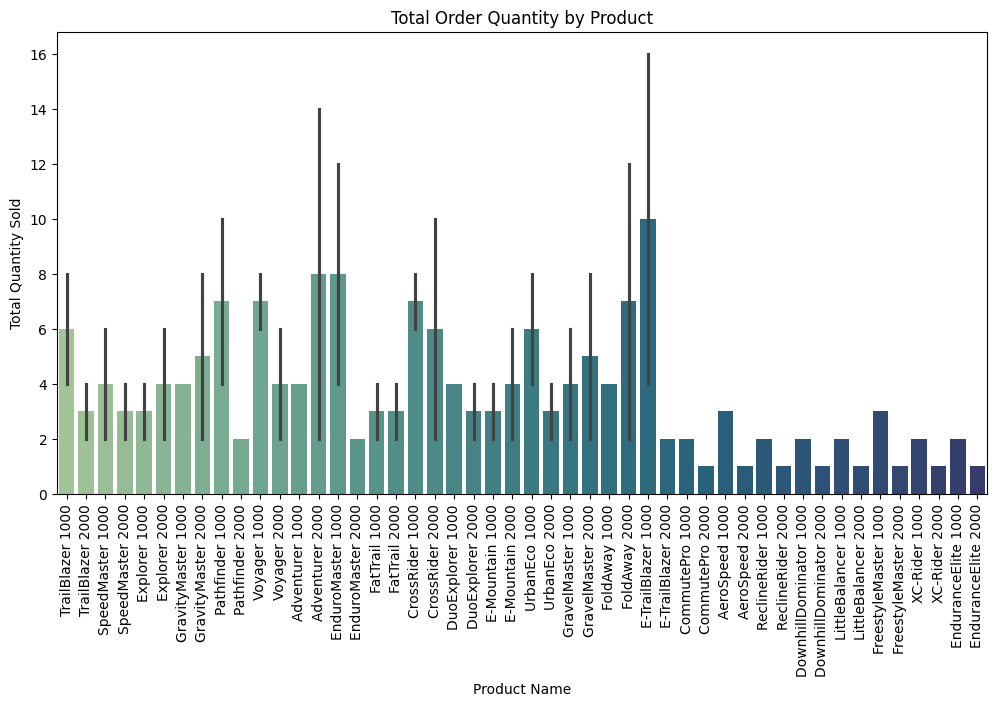

In [133]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Name', y='Order Quantity', data=data, estimator=sum, palette='crest')
plt.title('Total Order Quantity by Product')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.show()

In [62]:
sales_by_status = data.groupby('Order Status')['Order Total'].sum().reset_index()

In [135]:
fig = px.bar(
    sales_by_status,
    x='Order Total',
    y='Order Status',
    orientation='h',
    color='Order Total',
    color_continuous_scale='RdBu',
    title=' Total Sales by Order Status',
    labels={
        'Order Total': 'Total Sales ($)',
        'Order Status': 'Order Status'
    }
)
figlayout(fig)

fig.show()

In [137]:
import plotly.express as px

fig = px.box(
    data,
    x='Product Category',
    y='Product Price',
    points='outliers', 
    title='Box Plot of Product Prices by Category',
    labels={
        'Product Category': 'Product Category',
        'Product Price': 'Product Price $'  
    },
    color='Product Category',  
)

fig.update_layout(
    plot_bgcolor='white',
    font=dict(size=14),
    title_font=dict(size=20),
    xaxis_title_font=dict(size=16),
    yaxis_title_font=dict(size=16),
    xaxis_tickangle=-45
)

fig.show()



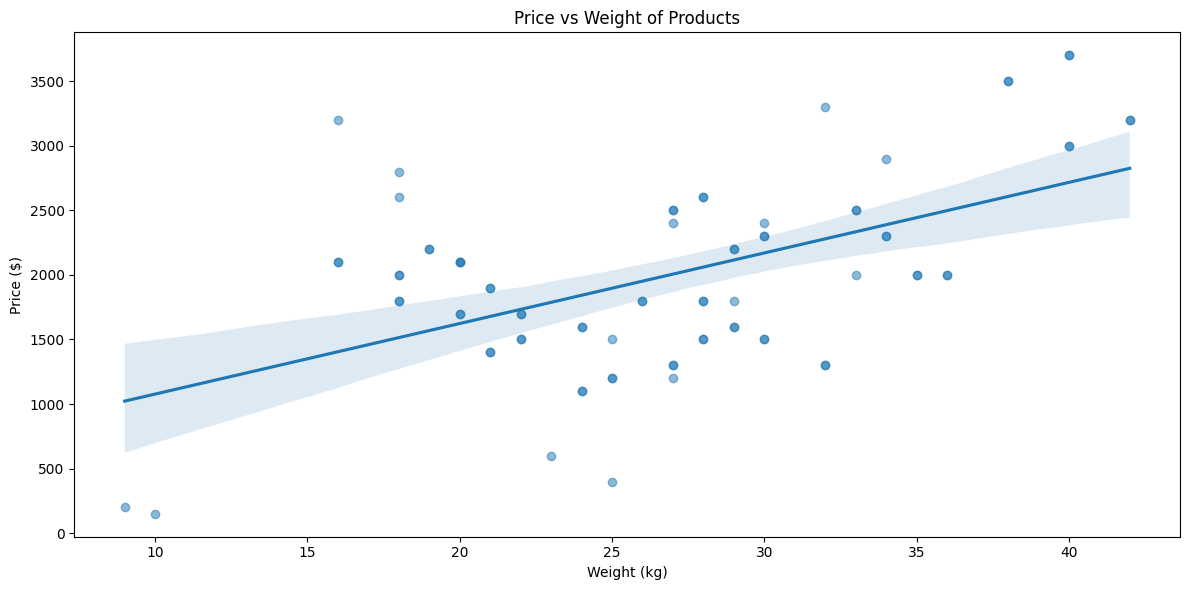

In [139]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Product Weight', y='Product Price', data=data, scatter_kws={'alpha':0.5})
plt.title('Price vs Weight of Products')
plt.xlabel('Weight (kg)')

plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_26436\1574348577.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




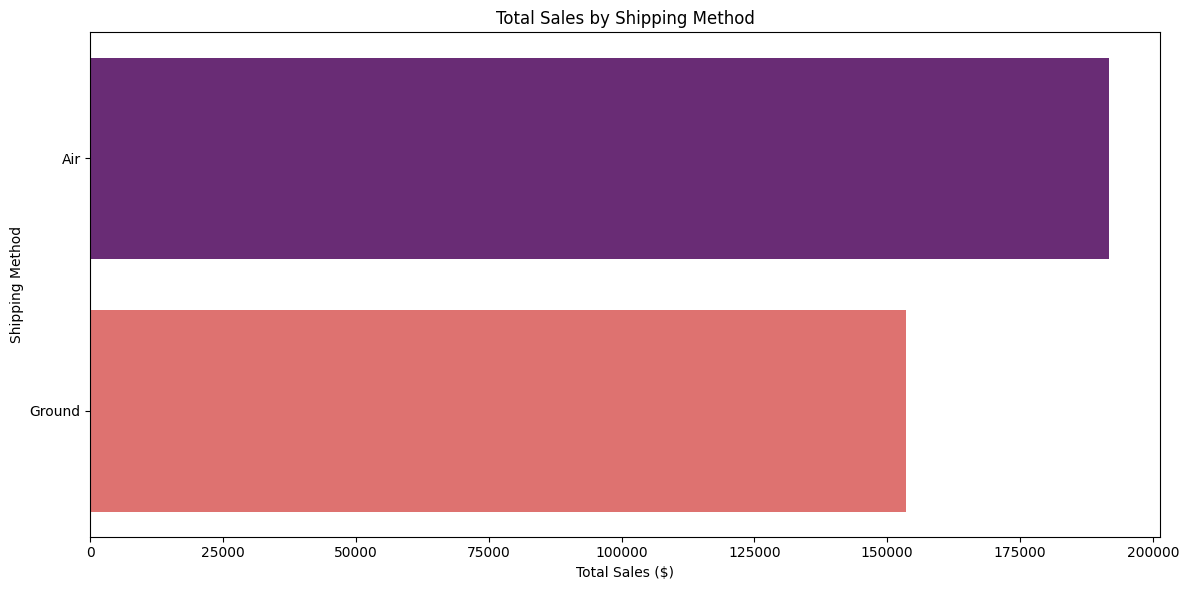

In [140]:
sales_by_shipping = data.groupby('Shipping Method')['Order Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Shipping Method', data=sales_by_shipping, palette='magma')
plt.title('Total Sales by Shipping Method')
plt.xlabel('Total Sales ($)')
plt.ylabel('Shipping Method')
plt.tight_layout()
plt.show()

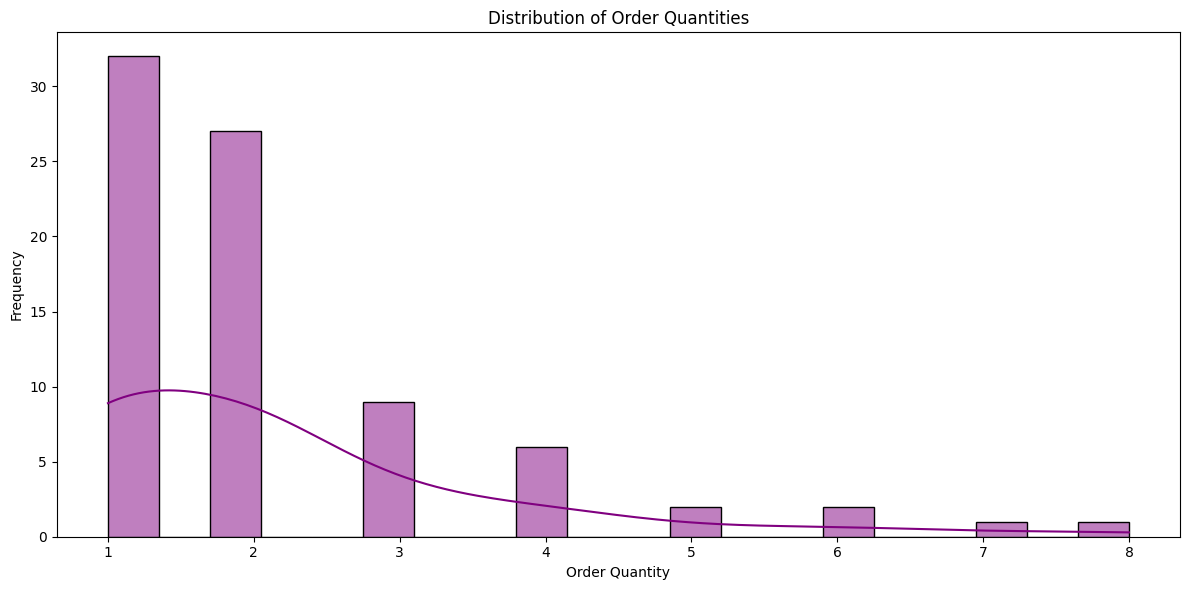

In [67]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Order Quantity'], bins=20, kde=True, color='purple')
plt.title('Distribution of Order Quantities')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_26436\2648806843.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Total', y='Customer Location', data=sales_by_country.sort_values('Order Total', ascending=False).head(10), palette='coolwarm')


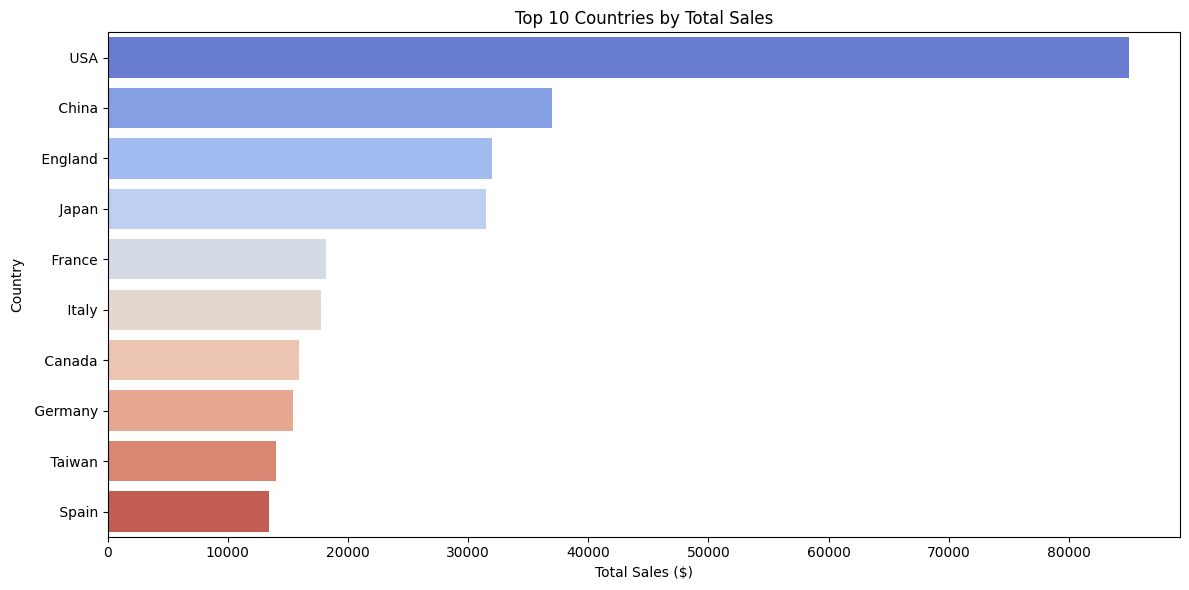

In [68]:
sales_by_country = data.groupby('Customer Location')['Order Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Customer Location', data=sales_by_country.sort_values('Order Total', ascending=False).head(10), palette='coolwarm')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

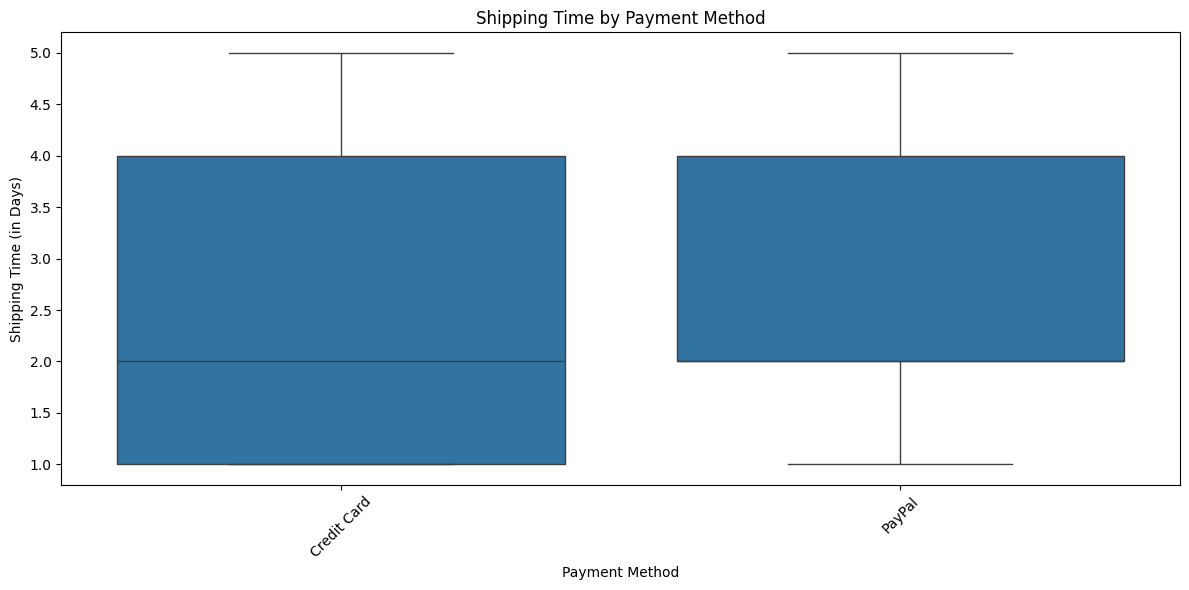

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Payment Method', y='Shipping Time (in Days)', data=data)
plt.title('Shipping Time by Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_26436\2642860771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Total', y='Product Color', data=sales_by_color, palette='Set2')


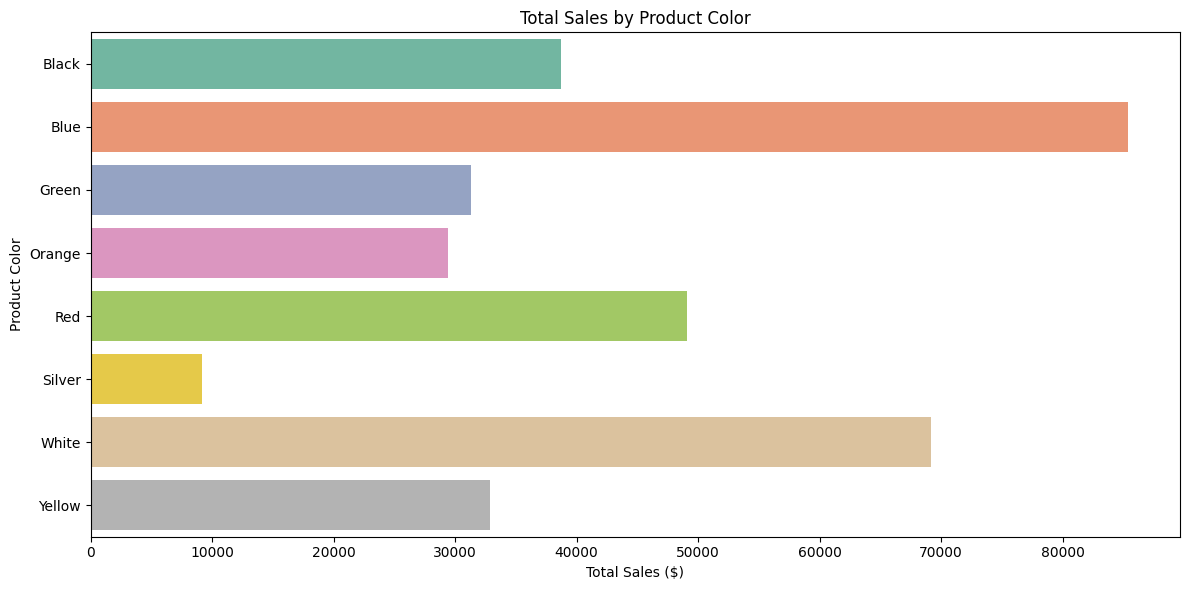

In [70]:
sales_by_color = data.groupby('Product Color')['Order Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Product Color', data=sales_by_color, palette='Set2')
plt.title('Total Sales by Product Color')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Color')
plt.tight_layout()
plt.show()

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_26436\2547197128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Quantity', y='Product Category', data=quantity_by_category, palette='pastel')


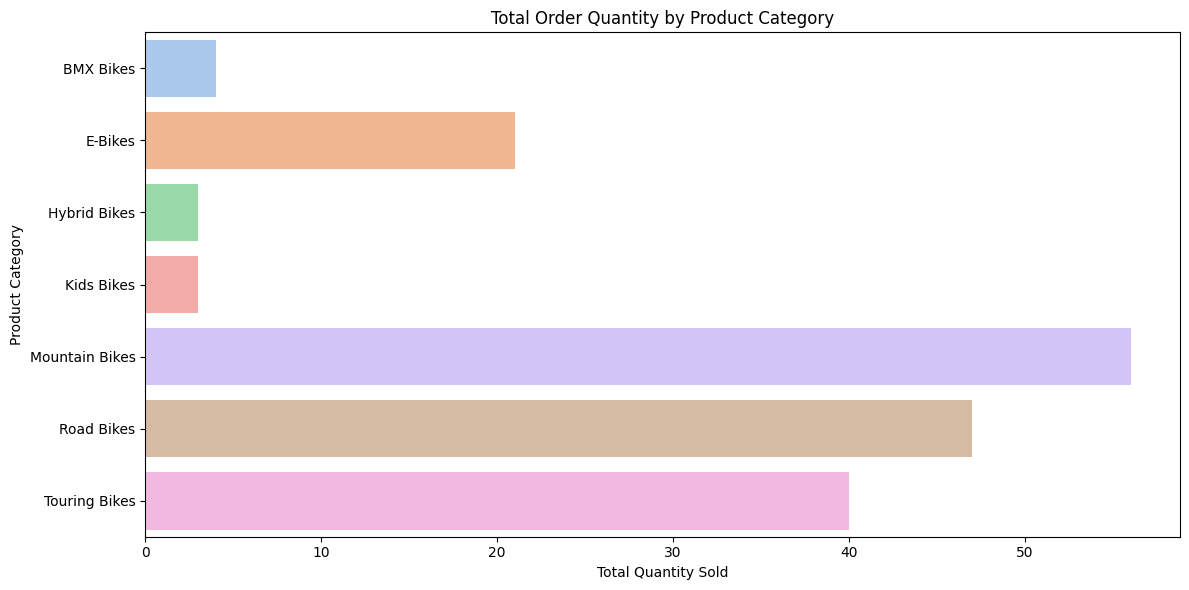

In [71]:
quantity_by_category = data.groupby('Product Category')['Order Quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Quantity', y='Product Category', data=quantity_by_category, palette='pastel')
plt.title('Total Order Quantity by Product Category')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_26436\3283589026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Total', y='Customer Feedback', data=sales_by_feedback, palette='spring')


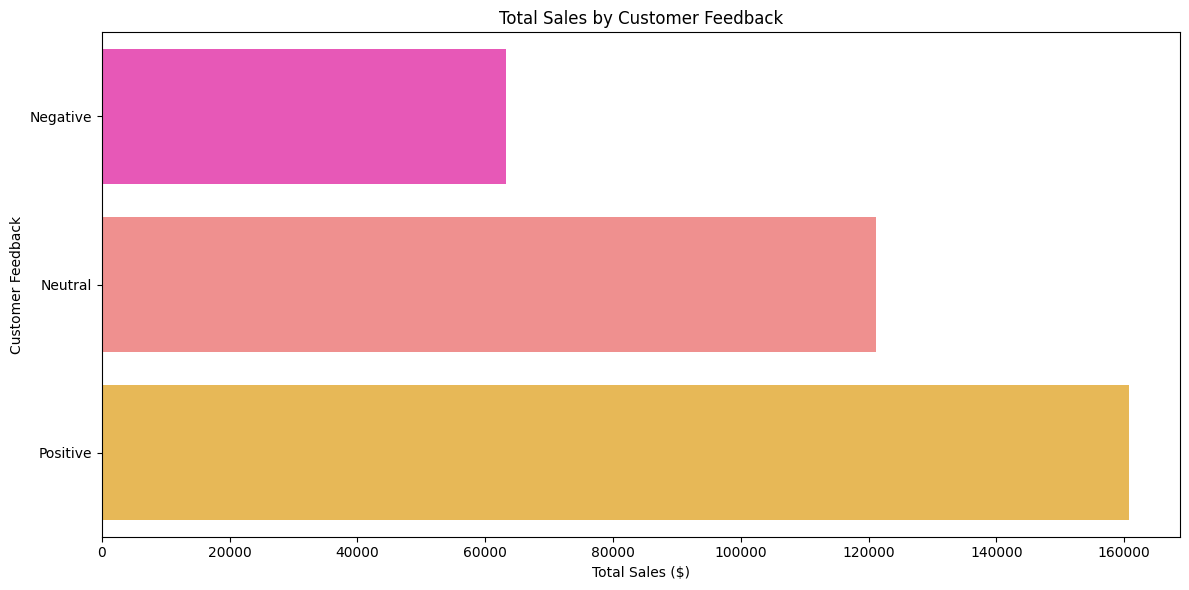

In [72]:
sales_by_feedback = data.groupby('Customer Feedback')['Order Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Total', y='Customer Feedback', data=sales_by_feedback, palette='spring')
plt.title('Total Sales by Customer Feedback')
plt.xlabel('Total Sales ($)')
plt.ylabel('Customer Feedback')
plt.tight_layout()
plt.show()

# ***6--Make training models***

In [73]:
features = data[['Product Price', 'Product Weight', 'Order Quantity']]
target = data['Order Total']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,train_size=.8, random_state=42)

# ***7-- training the models***

In [ ]:
def train_model(X_train, y_train):
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor()
    }

    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        results[model_name] = model

    return results


# ***8--evaluatino***

In [76]:
def evaluate_models(models, X_test, y_test):
   
    results = {}
    
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[model_name] = {
            'Mean Squared Error': mse,
            'R^2 Score': r2
        }
    return results


In [157]:
def print_results(results):
    for model_name, metrics in results.items():
        print(f'Model: {model_name}')
        print(f"  Mean Squared Error: {metrics['Mean Squared Error']:.2f}")
        print(f"  R^2 Score: {metrics['R^2 Score']:.2f}\n")
        

models = train_model(X_train, y_train)
results = evaluate_models(models, X_test, y_test)
print_results(results)

✅ Linear Regression model saved as model.pkl
Model: Linear Regression
  Mean Squared Error: 4397618.79
  R^2 Score: 0.86

Model: Random Forest
  Mean Squared Error: 10700286.25
  R^2 Score: 0.66

Model: Gradient Boosting
  Mean Squared Error: 8122880.88
  R^2 Score: 0.74



# ***9--Visual the results***

Model: Linear Regression
  Mean Squared Error: 4397618.79
  R^2 Score: 0.86

Model: Random Forest
  Mean Squared Error: 10420330.06
  R^2 Score: 0.67

Model: Gradient Boosting
  Mean Squared Error: 8144315.25
  R^2 Score: 0.74



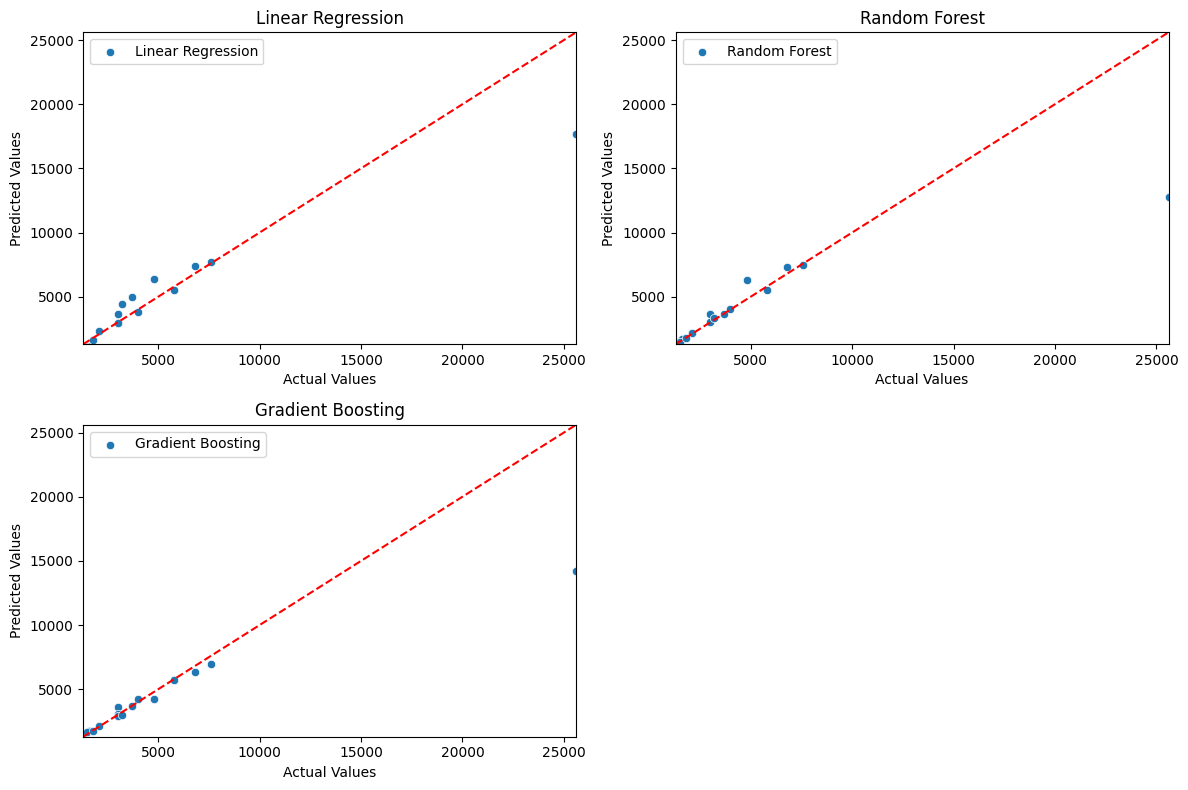

In [142]:
def plot_results(models, X_test, y_test):
    plt.figure(figsize=(12, 8))
    
    for i, (model_name, model) in enumerate(models.items()):
        y_pred = model.predict(X_test)
        plt.subplot(2, 2, i + 1)
        sns.scatterplot(x=y_test, y=y_pred, label=model_name)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط مرجعي
        plt.title(model_name)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.xlim(y_test.min(), y_test.max())
        plt.ylim(y_test.min(), y_test.max())
    
    plt.tight_layout()
    plt.show()
print_results(results)
plot_results(models, X_test, y_test)

# ***10--bYe***